In [26]:
get_ipython().run_line_magic('matplotlib', 'inline')
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np



In [27]:
url = 'http://www.uh.edu/~cldue/texts/demeter.html'
r = requests.get(url)
r.encoding = 'utf-8'
html = r.text
soup = BeautifulSoup(html)
body = soup.find('div', {'class': 'Section1'})
body = body.text



In [28]:
body = re.sub('\\n', ' ', body)
body = re.sub('\\xa0', '', body)
body = re.sub('[^A-z\s]', '', body)
body = re.sub('\[', '', body)
body = re.sub('\]', '', body)
words = body.split(' ')



In [29]:
for word in words:
    if word == '':
        words.remove(word)



In [30]:
word_index = sorted(list(set(words)))
indexer = dict(zip(word_index, np.arange(len(word_index))))
labeler = dict(zip(np.arange(len(word_index)), word_index))
counter = np.zeros(len(word_index))



In [31]:
for word in words:
    counter[indexer[word]] += 1



In [32]:
top_10 = np.argsort(counter)[-10:][::-1]
labels = [labeler[i] for i in top_10]
counts = list(counter[top_10])



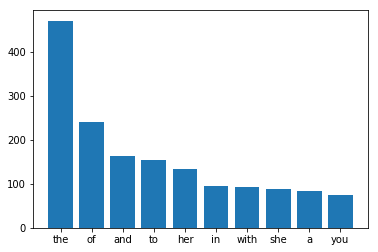

In [33]:
plt.bar(labels, counts)
plt.show()

